In [2]:
# データ処理ラブラり
import numpy as np
import pandas as pd
# データ可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline 
# LightGBM
import lightgbm as lgb
# Scikit-learn（評価算出）
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

OSError: dlopen(/Users/s.okubo/Documents/Projects/python_venvs/py3_6_8/.venv/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/s.okubo/Documents/Projects/python_venvs/py3_6_8/.venv/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [27]:
classes = pd.read_csv('kmnist_classmap.csv')
print(classes.shape)
classes


(10, 3)


index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を

In [30]:
# 訓練データの読み込み
X_train = np.load('kmnist-train-imgs.npz')['arr_0']
y_train = np.load('kmnist-train-labels.npz')['arr_0']
# テストデータの読み込み
X_test = np.load('kmnist-test-imgs.npz')['arr_0']
y_test = np.load('kmnist-test-labels.npz')['arr_0']



print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [31]:
print(y_train[0:5])
print(classes)


[8 7 0 1 4]
   index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を


In [32]:
labelindex = classes.set_index('index').to_dict()['char']
labelindex


{0: 'お',
 1: 'き',
 2: 'す',
 3: 'つ',
 4: 'な',
 5: 'は',
 6: 'ま',
 7: 'や',
 8: 'れ',
 9: 'を'}

In [33]:
print(X_train.min())
print(X_train.max())


0
255


Exception ignored in: <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7f7c8ceec7b8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 226, in __del__
    self.close()
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 217, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


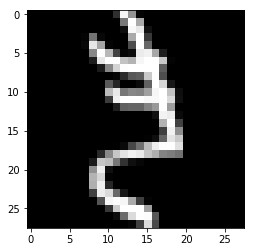

In [34]:
plt.imshow(X_train[423], cmap = plt.cm.gray)
plt.show()


In [35]:
print(y_train[423])
print(labelindex[1])

1
き


In [36]:
X_train[0,10:15,10:15]


array([[  0,   0, 133,  91,   7],
       [  0,   0, 128, 128,  20],
       [  0,   0,  95, 224,  20],
       [  0,   0, 112, 159,  64],
       [  0,   1, 211, 234, 253]], dtype=uint8)

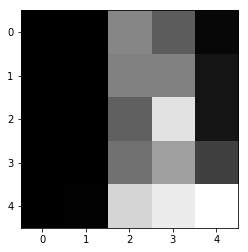

In [37]:
plt.imshow(X_train[0,10:15,10:15], cmap = plt.cm.gray)


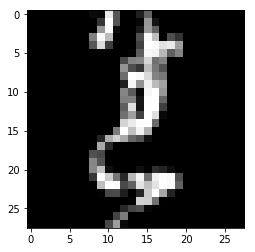

In [38]:
plt.imshow(X_train[0], cmap = plt.cm.gray)

In [0]:
X_train = X_train / 255 
X_test = X_test/ 255

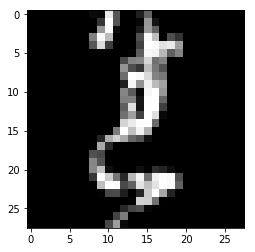

In [40]:
plt.imshow(X_train[0], cmap = plt.cm.gray)

In [41]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [42]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
# 訓練・テストデータの設定
train_data = lgb.Dataset(X_train, label=y_train)

?

In [0]:
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)

In [46]:
type(train_data)

lightgbm.basic.Dataset

**本稿では全て初期値を使いモデル訓練を行います。**

In [0]:
params = {
'task': 'train',
'boosting_type': 'gbdt',
'objective': 'multiclass',
'num_class': 10,
'verbose': 2,
}


In [64]:
%%time
gbm = lgb.train(
params,
train_data,
valid_sets=eval_data,
num_boost_round=100,
verbose_eval=5,
)


[5]	valid_0's multi_logloss: 1.71401
[10]	valid_0's multi_logloss: 1.43197
[15]	valid_0's multi_logloss: 1.2474
[20]	valid_0's multi_logloss: 1.11132
[25]	valid_0's multi_logloss: 1.00722
[30]	valid_0's multi_logloss: 0.924201
[35]	valid_0's multi_logloss: 0.856528
[40]	valid_0's multi_logloss: 0.799088
[45]	valid_0's multi_logloss: 0.751136
[50]	valid_0's multi_logloss: 0.711042
[55]	valid_0's multi_logloss: 0.675216
[60]	valid_0's multi_logloss: 0.645093
[65]	valid_0's multi_logloss: 0.617719
[70]	valid_0's multi_logloss: 0.594623
[75]	valid_0's multi_logloss: 0.573648
[80]	valid_0's multi_logloss: 0.5548
[85]	valid_0's multi_logloss: 0.537461
[90]	valid_0's multi_logloss: 0.52171
[95]	valid_0's multi_logloss: 0.508122
[100]	valid_0's multi_logloss: 0.49569
CPU times: user 12min 35s, sys: 885 ms, total: 12min 36s
Wall time: 6min 23s


In [56]:
preds = gbm.predict(X_test)

y_pred = []
for x in preds:
  y_pred.append(np.argmax(x))

confusion_matrix(y_test, y_pred)


array([[872,   3,   2,   4,  31,  16,   3,  34,  31,   4],
       [  2, 840,  34,   4,  24,   5,  49,   6,  15,  21],
       [  6,  22, 826,  48,  17,   7,  27,  14,  21,  12],
       [  2,  13,  31, 917,   8,   4,   6,   7,   3,   9],
       [ 35,  22,  24,  13, 834,   8,  23,   9,  18,  14],
       [  7,  25, 101,   7,  16, 802,  26,   2,  12,   2],
       [  2,  18,  52,   4,  19,   5, 885,   9,   3,   3],
       [  9,  21,  12,   5,  73,   2,  34, 787,  37,  20],
       [  5,  34,  10,  32,   2,   7,  21,   1, 883,   5],
       [  5,  21,  30,   7,  34,   3,  12,  26,  25, 837]])

In [60]:
'スコア{}'.format(accuracy_score(y_test, y_pred))


'スコア0.8483'

In [61]:
%time
print(1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
1
